# **Hpothesis Testing**

# **Imports**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly


#Scipy
from scipy import stats
from scipy.stats import norm, pearsonr
import statsmodels.api as sm

# Warnings 
import warnings 
warnings.filterwarnings("ignore")

# **Loading The Data**

In [2]:
# Loading the NYC Restaurant Data 
rd = pd.read_csv('rd')

In [3]:
# Loading the Yelp Data for NYC Restaurant Data 
ydf = pd.read_csv('ydf')

In [4]:
# Restaurant Inspection data Check 
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242682 entries, 0 to 242681
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  242682 non-null  int64  
 1   DBA                    241853 non-null  object 
 2   BORO                   242682 non-null  object 
 3   BUILDING               242284 non-null  object 
 4   STREET                 242668 non-null  object 
 5   ZIPCODE                239855 non-null  float64
 6   CUISINE DESCRIPTION    239995 non-null  object 
 7   INSPECTION DATE        242682 non-null  object 
 8   ACTION                 239995 non-null  object 
 9   VIOLATION CODE         238662 non-null  object 
 10  VIOLATION DESCRIPTION  238662 non-null  object 
 11  CRITICAL FLAG          242682 non-null  object 
 12  SCORE                  230796 non-null  float64
 13  GRADE                  116932 non-null  object 
 14  GRADE DATE             107898 non-nu

In [5]:
ydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   alias         848 non-null    object 
 1   name          848 non-null    object 
 2   image_url     848 non-null    object 
 3   url           848 non-null    object 
 4   review_count  848 non-null    int64  
 5   categories    848 non-null    object 
 6   rating        848 non-null    float64
 7   coordinates   848 non-null    object 
 8   transactions  848 non-null    object 
 9   location      848 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 66.4+ KB


# **Selecting Subset of Pizza Restaurants in Brooklyn**

In [6]:
# Selecting subset of only restaurants from Brooklyn
brooklyndf = rd[rd['BORO'].str.lower()=='brooklyn']

In [7]:
# Selecting subset of only restaurants in Brooklyn that have pizza in the cuisine description 
pizza_brooklyn_subset = brooklyndf[(brooklyndf['CUISINE DESCRIPTION'].str.lower()=='pizza')]

In [8]:
# Filtering out rows with NAN in the 'GRADE' column
pizza_brooklyn_subset = pizza_brooklyn_subset.dropna(subset=['GRADE'])

In [9]:
# Take a look at Brooklyn pizza restaurants in inspection data
print(pizza_brooklyn_subset)

           CAMIS                             DBA      BORO BUILDING  \
188     40580683  THE ORIGINAL PIZZA OF AVENUE L  Brooklyn     9514   
288     50132133                        ELEGANTE  Brooklyn     6922   
789     40645559                  BAYRIDGE PIZZA  Brooklyn     7704   
1124    50048923                Milly's Pizzeria  Brooklyn      834   
1384    50070118         BARCKLAYS PIZZA & PASTA  Brooklyn      916   
...          ...                             ...       ...      ...   
242013  50142813              SURF PIZZA & WINGS  Brooklyn     2115   
242298  50116736             FEDERICO'S PIZZERIA  Brooklyn     2313   
242468  50098909        99 CENTS UTICA HOT PIZZA  Brooklyn     1127   
242549  40745618                    MIKE'S PIZZA  Brooklyn      905   
242681  41038600                   LIBERTY PIZZA  Brooklyn      482   

                 STREET  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
188            AVENUE L  11236.0               Pizza      10/07/2022   
288

# **Merging Yelp Data with Inspections Data**

In [10]:
# Making the names of the restaurants in both data sets compatable for the merge 
column_name = 'name'
# Matching up the names for both datasets
ydf['name'] = ydf['name'].apply(lambda x: str(x).upper())

In [11]:
# Merging the two data sets on the names of the resaurants 
mdf = pd.merge(pizza_brooklyn_subset, ydf,left_on='DBA', right_on='name', how='inner', indicator=True)

# Dropping any Duplicate rows 
mdf.drop_duplicates (inplace=True)

#Display the merged dataframe
print ("\nMerged DataFrame:")
print(mdf)


Merged DataFrame:
        CAMIS                 DBA      BORO BUILDING               STREET  \
0    50089510        ROSA'S PIZZA  Brooklyn      374  METROPOLITAN AVENUE   
1    50089510        ROSA'S PIZZA  Brooklyn      374  METROPOLITAN AVENUE   
2    50089510        ROSA'S PIZZA  Brooklyn      374  METROPOLITAN AVENUE   
3    50089510        ROSA'S PIZZA  Brooklyn      374  METROPOLITAN AVENUE   
4    50089510        ROSA'S PIZZA  Brooklyn      374  METROPOLITAN AVENUE   
..        ...                 ...       ...      ...                  ...   
647  50134489  LITTLE ITALY PIZZA  Brooklyn      179       BEDFORD AVENUE   
648  41404362         COZZI PIZZA  Brooklyn      584             BROADWAY   
649  41404362         COZZI PIZZA  Brooklyn      584             BROADWAY   
650  41404362         COZZI PIZZA  Brooklyn      584             BROADWAY   
651  50124417          OMA GRASSA  Brooklyn      753        FULTON STREET   

     ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
0   

In [12]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CAMIS                  652 non-null    int64   
 1   DBA                    652 non-null    object  
 2   BORO                   652 non-null    object  
 3   BUILDING               652 non-null    object  
 4   STREET                 652 non-null    object  
 5   ZIPCODE                644 non-null    float64 
 6   CUISINE DESCRIPTION    652 non-null    object  
 7   INSPECTION DATE        652 non-null    object  
 8   ACTION                 652 non-null    object  
 9   VIOLATION CODE         649 non-null    object  
 10  VIOLATION DESCRIPTION  649 non-null    object  
 11  CRITICAL FLAG          652 non-null    object  
 12  SCORE                  652 non-null    float64 
 13  GRADE                  652 non-null    object  
 14  GRADE DATE             652 non-null    obj

In [13]:
# Saving the merged dataframe to upload into other notebooks
mdf.to_csv('mdf', index=False)

# **Data Cleaning**

In [14]:
# Creating a new column 'unique_id' by combining 'name' and 'CAMIS'
mdf['unique_id'] = mdf['name'] + '_' + mdf['CAMIS'].astype(str)

# Sorting the DataFrame based on the new 'unique_id' column
mdf = mdf.sort_values(by='unique_id')

# If you want to keep only the last occurrence of each unique identifier, you can use the following:
mdf = mdf.sort_values(by='INSPECTION DATE').drop_duplicates(subset=['unique_id'], keep='last')

In [15]:
# Dropping irrelevant columns
mdf.drop(['_merge', 'GRADE', 'BUILDING', 'ZIPCODE', 'Council District', 'Longitude', 'Latitude', 'coordinates', 'url','CRITICAL FLAG', 'alias', 'categories'], axis=1, inplace=True)

In [16]:
# checking missing data in data 
def check_missing_data(rdf):
    total = mdf.isnull().sum().sort_values(ascending = False)
    percent = (mdf.isnull().sum()/mdf.isnull().count()*100).sort_values(ascending = False)
    percent = percent.round(2).astype(str) + '%'
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data_result = check_missing_data(mdf)
missing_data_result.head()

,Total,Percent
VIOLATION CODE,1,1.23%
VIOLATION DESCRIPTION,1,1.23%
CAMIS,0,0.0%
INSPECTION TYPE,0,0.0%
location,0,0.0%


In [17]:
# Function to eliminate rows with missing Grade dates
def eliminate_missing_grade_date_rows(mdf):
    """
    Eliminate rows with missing data in the "GRADE DATE" column.

    Returns:
    - Cleaned DataFrame without rows with missing "GRADE DATE"
    """
    # Drop rows with missing values in the "GRADE DATE" column
    cleaned_dataframe = mdf.dropna(subset=["GRADE DATE"])

    return cleaned_dataframe

mdf = eliminate_missing_grade_date_rows(mdf)

In [18]:
# Filtering out only the initial inspections and re-inspections
def filter_inspection_type(mdf):
    """
    Filter rows based on the values in the "INSPECTION TYPE" column.

    Returns:
    - DataFrame containing only rows with specified inspection types
    """
    inspection_types_to_keep = ['Cycle Inspection / Initial Inspection', 'Cycle Inspection / Re-inspection']
    filtered_rdf = mdf.loc[merged_df['INSPECTION TYPE'].isin(inspection_types_to_keep)]

    return filtered_rdf

In [19]:
#create a dataframe with the most recent inspection data
mdf = mdf.sort_values(by='INSPECTION DATE').drop_duplicates(subset=['CAMIS'], keep='last')

In [20]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 189 to 356
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CAMIS                  81 non-null     int64  
 1   DBA                    81 non-null     object 
 2   BORO                   81 non-null     object 
 3   STREET                 81 non-null     object 
 4   CUISINE DESCRIPTION    81 non-null     object 
 5   INSPECTION DATE        81 non-null     object 
 6   ACTION                 81 non-null     object 
 7   VIOLATION CODE         80 non-null     object 
 8   VIOLATION DESCRIPTION  80 non-null     object 
 9   SCORE                  81 non-null     float64
 10  GRADE DATE             81 non-null     object 
 11  INSPECTION TYPE        81 non-null     object 
 12  name                   81 non-null     object 
 13  image_url              81 non-null     object 
 14  review_count           81 non-null     int64  
 15  rating    

In [21]:
mdf.describe()

,CAMIS,SCORE,review_count,rating
count,8.100000e+01,81.000000,81.000000,81.000000
mean,4.675782e+07,11.567901,297.222222,3.759259
std,4.372437e+06,8.001466,515.898803,0.592195
min,4.038630e+07,0.000000,22.000000,1.500000
25%,4.140436e+07,8.000000,71.000000,3.500000
50%,5.005698e+07,12.000000,167.000000,4.000000
75%,5.010201e+07,13.000000,291.000000,4.000000
max,5.014129e+07,59.000000,3322.000000,5.000000


In [22]:
mdf.head()

,CAMIS,DBA,BORO,STREET,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,SCORE,GRADE DATE,INSPECTION TYPE,name,image_url,review_count,rating,transactions,location,unique_id
189,41702359,TONY'S PIZZA,Brooklyn,KNICKERBOCKER AVENUE,Pizza,01/11/2023,Violations were cited in the following area(s).,06C,"Food, supplies, and equipment not protected fr...",9.0,01/11/2023,Cycle Inspection / Re-inspection,TONY'S PIZZA,https://s3-media4.fl.yelpcdn.com/bphoto/_DDqcM...,55,3.5,[],"{'address1': '1107 Rutland Rd', 'address2': ''...",TONY'S PIZZA_41702359
64,50001003,FORNINO,Brooklyn,MANHATTAN AVENUE,Pizza,01/15/2023,Violations were cited in the following area(s).,02G,Cold TCS food item held above 41 °F; smoked or...,27.0,01/15/2023,Cycle Inspection / Re-inspection,FORNINO,https://s3-media2.fl.yelpcdn.com/bphoto/TabOPQ...,303,3.5,[],"{'address1': 'Pier 6 Brooklyn Bridge Park', 'a...",FORNINO_50001003
371,50085693,JOE'S PIZZA OF PARK SLOPE,Brooklyn,5 AVENUE,Pizza,01/24/2023,Violations were cited in the following area(s).,04M,Live roaches in facility's food or non-food area.,37.0,01/24/2023,Cycle Inspection / Re-inspection,JOE'S PIZZA OF PARK SLOPE,https://s3-media3.fl.yelpcdn.com/bphoto/rvZE8N...,40,2.0,"['pickup', 'delivery']","{'address1': '349 5th Ave', 'address2': '', 'a...",JOE'S PIZZA OF PARK SLOPE_50085693
366,50104265,PUBLIC DISPLAY OF AFFECTION,Brooklyn,UNION STREET,Pizza,02/14/2024,Violations were cited in the following area(s).,10B,Anti-siphonage or back-flow prevention device ...,7.0,02/14/2024,Cycle Inspection / Re-inspection,PUBLIC DISPLAY OF AFFECTION,https://s3-media1.fl.yelpcdn.com/bphoto/ieN18l...,90,4.0,"['delivery', 'pickup']","{'address1': '669 Union St', 'address2': None,...",PUBLIC DISPLAY OF AFFECTION_50104265
651,50124417,OMA GRASSA,Brooklyn,FULTON STREET,Pizza,02/16/2024,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,3.0,02/16/2024,Pre-permit (Operational) / Initial Inspection,OMA GRASSA,https://s3-media2.fl.yelpcdn.com/bphoto/0YQopC...,26,4.5,[],"{'address1': '753 Fulton St', 'address2': '', ...",OMA GRASSA_50124417


# **Hypothesis Test 1**

**Try to find a correlation between scores on inspections and the ratings on Yelp**


 - The null hypothesis for this question would be that the restaurant inspection score and review count does not significantly affect the rating reviews on Yelp for pizza restaurants in Brooklyn NY.
 
  - The alternative hypothesis for this question would be that the restaurant inspection score and review count does affect the rating reviews on Yelp for the pizza restaurants in Brooklyn NY. 

In [23]:
# Perform Pearson correlation test 
correlation, p_value = pearsonr(mdf['SCORE'], mdf['review_count'])

# Print results
print(f'Correlation: {correlation:.2f}')
print(f'P-value: {p_value:.4f}')

# Check for significance based on the p-value
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('There is no significant correlation.')

Correlation: 0.10
P-value: 0.3854
There is no significant correlation.


In [24]:
# Select the columns of interest
selected_columns = ['SCORE', 'review_count']
subset_df = mdf[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Print or display the correlation matrix
print(correlation_matrix)

                 SCORE  review_count
SCORE         1.000000      0.097736
review_count  0.097736      1.000000


- It seems like the correlation between SCORE and review_count is relatively low (0.17), and therefore it is not visually prominent on the heatmap.

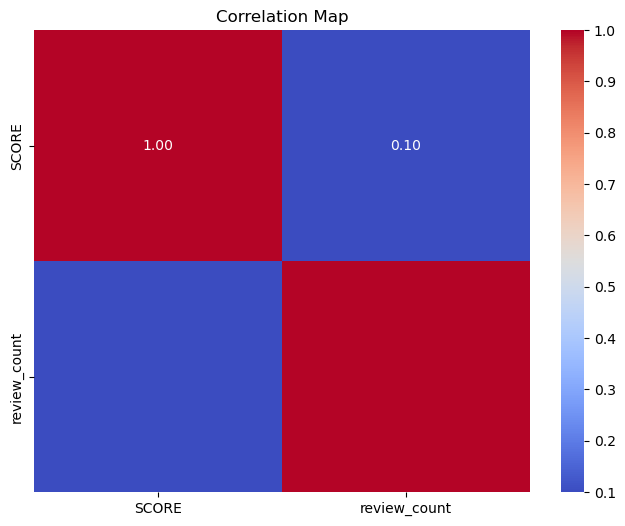

In [25]:
numeric_columns = ['SCORE', 'review_count']

mdf_numeric = mdf[numeric_columns].apply(pd.to_numeric, errors='coerce').dropna()

c_matrix = mdf_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=.1, vmax=1)
plt.title('Correlation Map')
plt.show()

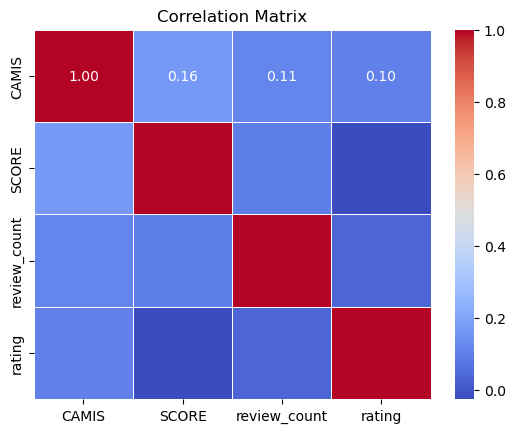

In [26]:
# Assuming 'restaurant_name' is a non-numeric column
numeric_data = mdf.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# **Hypothesis Test 2**

In [27]:
# Perform Pearson correlation test 
correlation, p_value = pearsonr(mdf['review_count'], mdf['rating'])

# Print results
print(f'Correlation: {correlation:.2f}')
print(f'P-value: {p_value:.4f}')

# Check for significance based on the p-value
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('There is no significant correlation.')

Correlation: 0.04
P-value: 0.7527
There is no significant correlation.


In [28]:
# Select the columns of interest
selected_columns = ['review_count', 'rating']
subset_df = mdf[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Print or display the correlation matrix
print(correlation_matrix)

              review_count    rating
review_count      1.000000  0.035548
rating            0.035548  1.000000


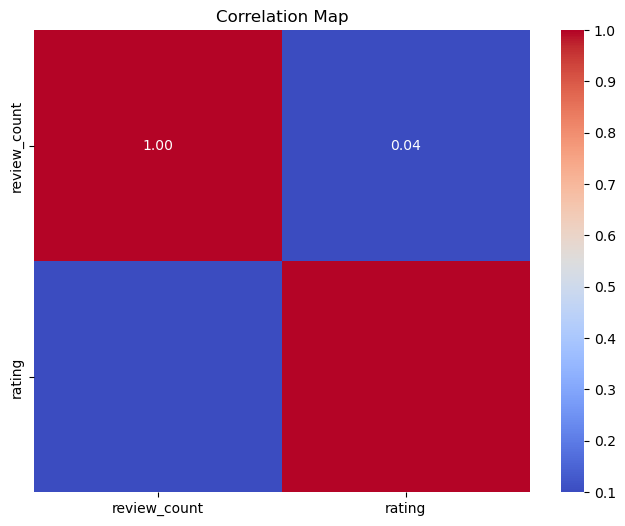

In [29]:
numeric_columns = ['review_count', 'rating']

mdf_numeric = mdf[numeric_columns].apply(pd.to_numeric, errors='coerce').dropna()

c_matrix = mdf_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=.1, vmax=1)
plt.title('Correlation Map')
plt.show()

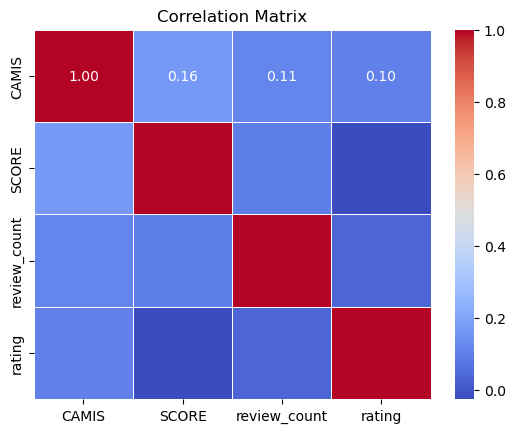

In [30]:
# Assuming 'restaurant_name' is a non-numeric column
numeric_data = mdf.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# **Visualizations**

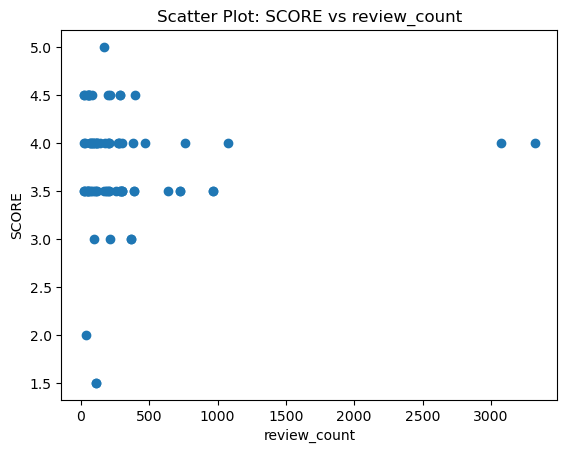

In [31]:
plt.scatter(mdf_numeric['review_count'], mdf_numeric['rating'])
plt.xlabel('review_count')
plt.ylabel('SCORE')
plt.title('Scatter Plot: SCORE vs review_count')
plt.show()

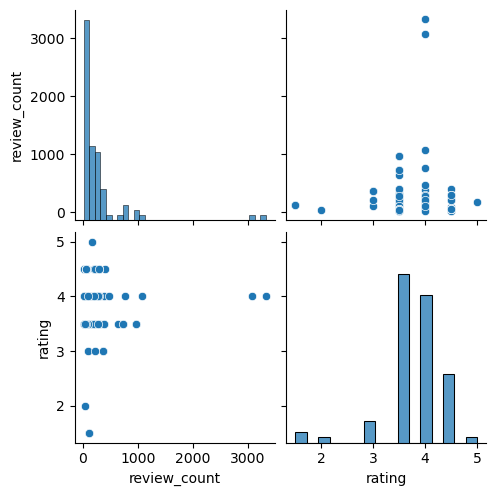

In [32]:
sns.pairplot(mdf_numeric)
plt.show()

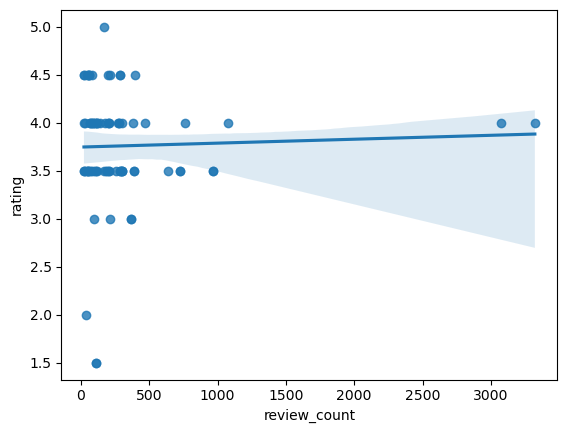

In [33]:
sns.regplot(x='review_count', y='rating', data=mdf_numeric)
plt.show()

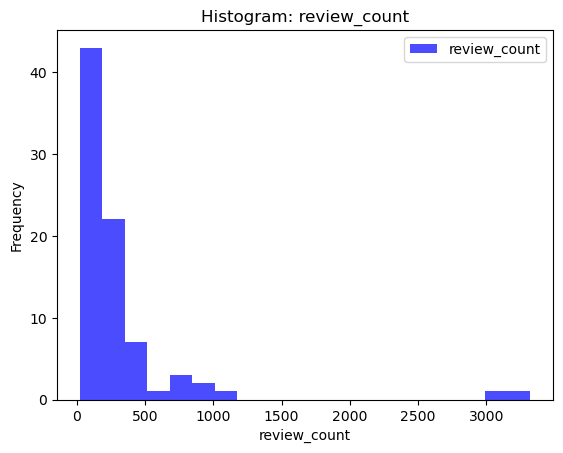

In [34]:
plt.hist(mdf_numeric['review_count'], bins=20, color='blue', alpha=0.7, label='review_count')
plt.xlabel('review_count')
plt.ylabel('Frequency')
plt.title('Histogram: review_count')
plt.legend()
plt.show()

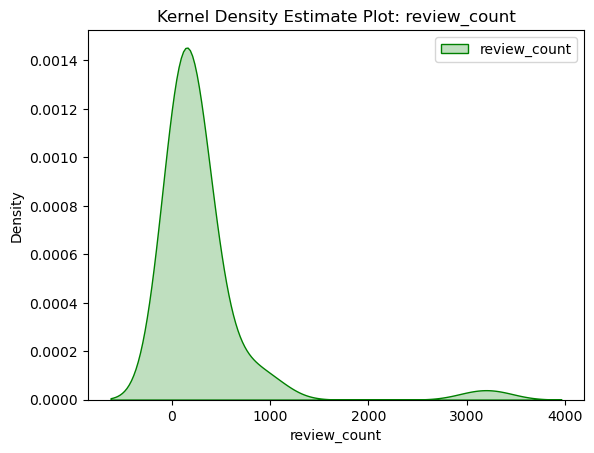

In [35]:
sns.kdeplot(mdf_numeric['review_count'], shade=True, color='green', label='review_count')
plt.xlabel('review_count')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot: review_count')
plt.legend()
plt.show()

In [36]:
# Filtering out the restaurants with more review counts and better scores
df_filtered = mdf[(mdf['review_count'] >= 200)]

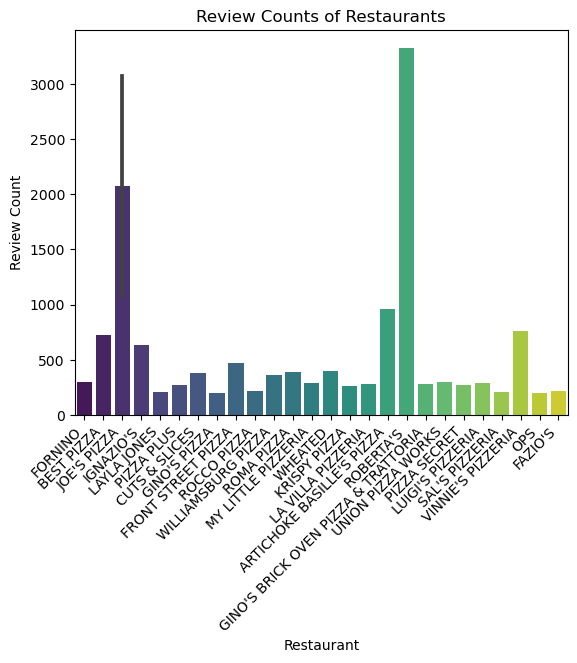

In [37]:
# Bar plot for review counts
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='name', y='review_count', data=df_filtered, palette='viridis')
plt.title('Review Counts of Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Review Count')
plt.xticks(rotation=45, ha='right');

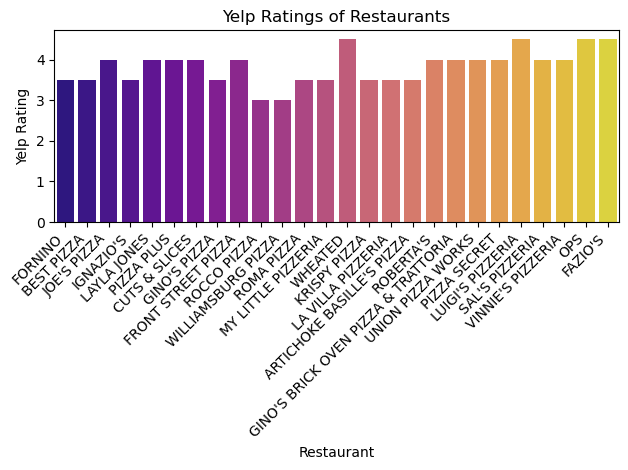

In [38]:
# Bar plot for Yelp ratings
plt.subplot(1, 1, 1)
sns.barplot(x='name', y='rating', data=df_filtered, palette='plasma')
plt.title('Yelp Ratings of Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Yelp Rating')
plt.xticks(rotation=45, ha='right')
# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

# **Summary of Hypothesis Testing Results**

 In this notebook, we conducted multiple hypothesis tests to explore potential correlations between ratings and review counts, and inspection scores with review counts. Despite our efforts, none of the tests revealed statistically significant correlations between the variables under investigation. So as far as Pizza restaurants in Brooklyn, NY, there is no correlation that supports a theory of better inspection scores mean better ratings on YELP. The size of the data seems to be the cause for the lack of correlation because there is simply too much data.